# **구글 드라이브 마운트**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **필요한 라이브러리 불러오기**

In [ ]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import glob
from PIL import Image
from google.colab.patches import cv2_imshow

# **Glob를 사용해 구글 드라이브 내 이미지 파일 모두 불러오기**
# **& Adaptive THRESHOLD를 이용한 이미지 데이터 PREPROCESSING**

In [ ]:
img_files = glob.glob('/content/drive/MyDrive/01_textinthewild_book_images_new/book/*.jpg')
len(img_files)

In [ ]:
for i in range(len(img_files)):
  image = cv2.imread(img_files[i], cv2.IMREAD_GRAYSCALE)
  thres = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)
  original_name=img_files[i]
  filename=original_name.split('/')
  filename=filename[-1:]
  result = ' '.join(s for s in filename)
  filename='/content/drive/MyDrive/01_textinthewild_book_images_new/preprocessing_ImgData/'+result
  cv2.imwrite(filename,thres)



# **이미지 이진화("GrayScale" / "Global Threshold" / "Adaptive Threshold" ) 전처리 후 시각화 비교**

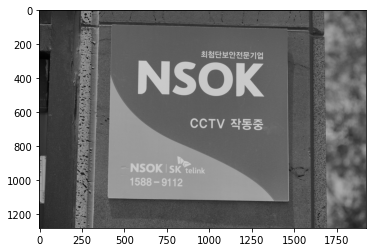

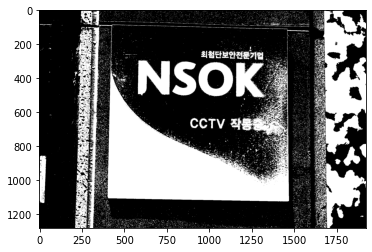

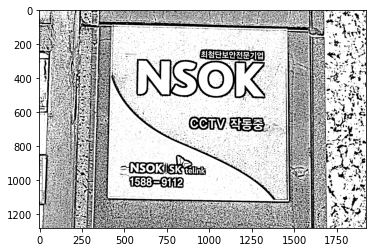

In [ ]:
image = cv2.imread('/content/drive/MyDrive/2A28E883244E40AE1EE8F925FB659DC5.jpg', cv2.IMREAD_GRAYSCALE)
ret, thres1 = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.show()

# **이미지 이진화("GrayScale" / "Otsu-Algorithm" / "Global Threshold" / "Adaptive Threshold" ) 전처리 후 시각화 비교**

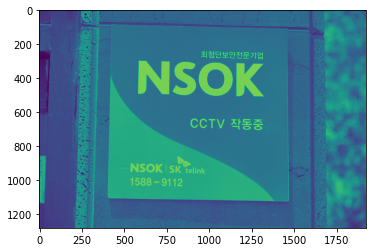

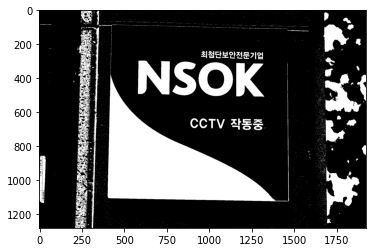

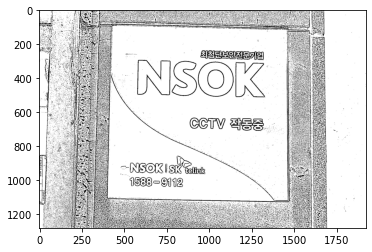

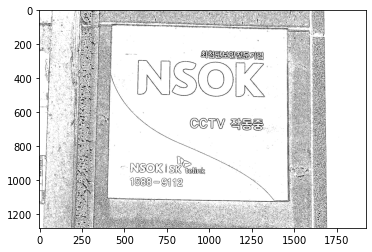

In [ ]:
gray_img = cv2.imread('/content/drive/MyDrive/2A28E883244E40AE1EE8F925FB659DC5.jpg', cv2.IMREAD_GRAYSCALE)
kernal_size=9
c=5
t,t_otsu=cv2.threshold(gray_img,-1,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
th2=cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,kernal_size,c)
th3=cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,kernal_size,c)

plt.imshow(gray_img)
plt.show()

plt.imshow(cv2.cvtColor(t_otsu, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(th2, cv2.COLOR_GRAY2RGB))
plt.show()
plt.imshow(cv2.cvtColor(th3, cv2.COLOR_GRAY2RGB))
plt.show()

# **JSON 파일 분리**
1.   train_anotation.json
2.   validation_anotation.json
3.   test_anotation.json 

In [ ]:
import json
file = json.load(open('/content/drive/MyDrive/01_textinthewild_book_images_new/textinthewild_data_info.json')) #전체 JSON파일 경로 입력
import random
import os

ocr_good_files = os.listdir('/content/drive/MyDrive/01_textinthewild_book_images_new/deep-text-recognition-benchmark/preprocessing_ImgData/data/') # 이미지 프로세싱한 이미지 파일 파일 경로
len(ocr_good_files) # 37220

random.shuffle(ocr_good_files)

n_train = int(len(ocr_good_files) * 0.7)
n_test = int(len(ocr_good_files) * 0.3)

print(n_train, n_test) 

train_files = ocr_good_files[:n_train]
test_files = ocr_good_files[-n_test:]

## train/test 이미지들에 해당하는 id 값을 저장

train_img_ids = {}
test_img_ids = {}

for image in file['images']:
    if image['file_name'] in train_files:
        train_img_ids[image['file_name']] = image['id']
    elif image['file_name'] in test_files:
        test_img_ids[image['file_name']] = image['id']

## train/test 이미지들에 해당하는 annotation 들을 저장

train_annotations = {f:[] for f in train_img_ids.keys()}
test_annotations = {f:[] for f in test_img_ids.keys()}

train_ids_img = {train_img_ids[id_]:id_ for id_ in train_img_ids}
test_ids_img = {test_img_ids[id_]:id_ for id_ in test_img_ids}

for idx, annotation in enumerate(file['annotations']):
    if idx % 5000 == 0:
        print(idx,'/',len(file['annotations']),'processed')
    if annotation['attributes']['class'] != 'word':
        continue
    if annotation['image_id'] in train_ids_img:
        train_annotations[train_ids_img[annotation['image_id']]].append(annotation)
    elif annotation['image_id'] in test_ids_img:
        test_annotations[test_ids_img[annotation['image_id']]].append(annotation)

with open('train_annotation.json', 'w') as file:
    json.dump(train_annotations, file)
with open('test_annotation.json', 'w') as file:
    json.dump(test_annotations, file)

11433 2449 2449
0 / 2097591 processed
5000 / 2097591 processed
10000 / 2097591 processed
15000 / 2097591 processed
20000 / 2097591 processed
25000 / 2097591 processed
30000 / 2097591 processed
35000 / 2097591 processed
40000 / 2097591 processed
45000 / 2097591 processed
50000 / 2097591 processed
55000 / 2097591 processed
60000 / 2097591 processed
65000 / 2097591 processed
70000 / 2097591 processed
75000 / 2097591 processed
80000 / 2097591 processed
85000 / 2097591 processed
90000 / 2097591 processed
95000 / 2097591 processed
100000 / 2097591 processed
105000 / 2097591 processed
110000 / 2097591 processed
115000 / 2097591 processed
120000 / 2097591 processed
125000 / 2097591 processed
130000 / 2097591 processed
135000 / 2097591 processed
140000 / 2097591 processed
145000 / 2097591 processed
150000 / 2097591 processed
155000 / 2097591 processed
160000 / 2097591 processed
165000 / 2097591 processed
170000 / 2097591 processed
175000 / 2097591 processed
180000 / 2097591 processed
185000 / 2

# **데이터 2차 가공**
**txt파일 생성 및 Bounding Box 기준으로 이미지 Cutting**

**gt_test.txt 생성 및 이미지 분리**

In [ ]:
import json
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm


#data_root_path : 이미지 이진화 된 파일이 있는 폴더 경로 지정(preprocessing_ImgData)
data_root_path = '/content/drive/MyDrive/01_textinthewild_book_images_new/deep-text-recognition-benchmark/preprocessing_ImgData/data/'

#save_root_path : txt저장할 폴더 지정
save_root_path = '/content/drive/MyDrive/01_textinthewild_book_images_new/deep-text-recognition-benchmark/boundingBox_Img/'

#test_annotation 파일 경로를 지정
test_annotations = json.load(open('/content/test_annotation.json')) 
gt_file = open(save_root_path+'gt_test.txt', 'w')
for file_name in tqdm(test_annotations):
    annotations = test_annotations[file_name]
    image = cv2.imread(data_root_path+file_name)
    for idx, annotation in enumerate(annotations):
        x,y,w,h = annotation['bbox']
        if x<= 0 or y<= 0 or w <= 0 or h <= 0:
            continue
        text = annotation['text']
        crop_img = image[y:y+h,x:x+w]
        crop_file_name = file_name[:-4]+'_{:03}.jpg'.format(idx+1)
        cv2.imwrite(save_root_path+'test/'+crop_file_name, crop_img)
        gt_file.write("test/{}\t{}\n".format(crop_file_name, text))

100%|██████████| 2449/2449 [18:14<00:00,  2.24it/s]


gt_validation.txt 생성 및 이미지 분리

In [ ]:
import json
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

#data_root_path : 이미지 이진화 된 파일이 있는 폴더 경로 지정(preprocessing_ImgData)
data_root_path = '/content/drive/MyDrive/01_textinthewild_book_images_new/deep-text-recognition-benchmark/preprocessing_ImgData/data/'

#save_root_path : txt저장할 폴더 지정
save_root_path = '/content/drive/MyDrive/01_textinthewild_book_images_new/deep-text-recognition-benchmark/boundingBox_Img/'

validation_annotations = json.load(open('/content/validation_annotation.json')) #validation_anotation.json 파일 경로 입력
gt_file = open(save_root_path+'gt_validation.txt', 'w')
for file_name in tqdm(validation_annotations):
    annotations = validation_annotations[file_name]
    image = cv2.imread(data_root_path+file_name)
    if image is None:                             # JSON파일에 파일명은 있지만 실제 이미지가 없는 경우 예외처리
      print(file_name+'이미지가 없습니다!')
    else :
      for idx, annotation in enumerate(annotations):
          x,y,w,h = annotation['bbox']
          if x<= 0 or y<= 0 or w <= 0 or h <= 0:
              continue        
          text = annotation['text']
          crop_img = image[y:y+h,x:x+w]
          crop_file_name = file_name[:-4]+'_{:03}.jpg'.format(idx+1)
          cv2.imwrite(save_root_path+'validation/'+crop_file_name, crop_img)
          gt_file.write("validation/{}\t{}\n".format(crop_file_name, text))

100%|██████████| 2449/2449 [18:29<00:00,  2.21it/s]


gt_train.txt 생성 및 이미지 분리

In [ ]:
import json
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

#data_root_path : 이미지 이진화 된 파일이 있는 폴더 경로 지정(preprocessing_ImgData)
data_root_path = '/content/drive/MyDrive/01_textinthewild_book_images_new/deep-text-recognition-benchmark/preprocessing_ImgData/data/'

#save_root_path : txt저장할 폴더 지정
save_root_path = '/content/drive/MyDrive/01_textinthewild_book_images_new/deep-text-recognition-benchmark/boundingBox_Img/'

# train_anotation.json파일 경로 입력
train_annotations = json.load(open('/content/train_annotation.json')) 
gt_file = open(save_root_path+'gt_train.txt', 'w')
for file_name in tqdm(train_annotations):
    annotations = train_annotations[file_name]
    image = cv2.imread(data_root_path+file_name)
    for idx, annotation in enumerate(annotations):
          x,y,w,h = annotation['bbox']
          if x<= 0 or y<= 0 or w <= 0 or h <= 0:
              continue        
          text = annotation['text']
          crop_img = image[y:y+h,x:x+w]
          crop_file_name = file_name[:-4]+'_{:03}.jpg'.format(idx+1)
          try:
            cv2.imwrite(save_root_path+'train/'+crop_file_name, crop_img)
            gt_file.write("train/{}\t{}\n".format(crop_file_name, text))
          except :
            pass



    
      

  



100%|██████████| 11433/11433 [1:26:03<00:00,  2.21it/s]


In [ ]:
import pandas as pd
df=pd.read_csv("/content/log_train_수정본1.csv")
df

,EPS,Train Loss,Valid Loss,Elapsed_time
0,1,134.16475,122.59132,5.43700
1,2000,5.17412,3.63517,3564.41753
2,4000,2.50339,1.94157,7204.89160
3,6000,1.55785,1.45909,10862.28870
4,8000,1.25374,1.24667,14355.52212
5,10000,1.05002,1.09619,17819.06195
6,12000,0.93661,1.00508,21276.41524
7,14000,0.83082,0.98687,24736.37588
8,16000,0.76478,0.92655,28195.38785
9,18000,0.67291,0.88366,31656.02909


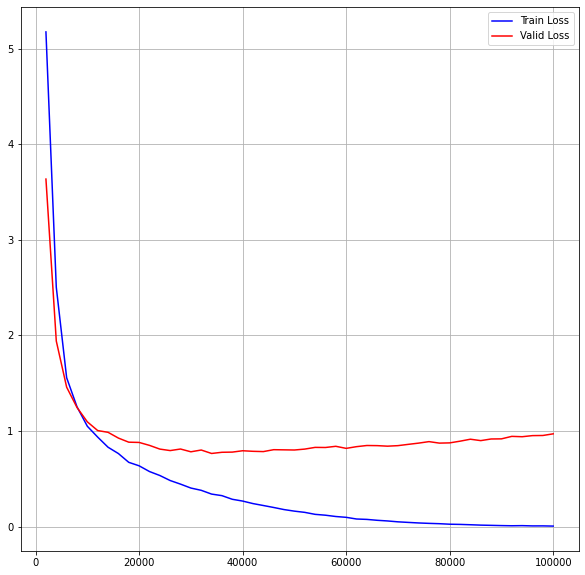

In [ ]:
new_df = df.drop(0, axis=0)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(new_df['EPS'], new_df['Train Loss'], color="blue") 
plt.plot(new_df['EPS'], new_df['Valid Loss'],color="red") 
plt.legend(['Train Loss', 'Valid Loss'])
plt.grid()
plt.show()